## Question 2 (b)(iv)

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd

### Setting the model parameter like shape of input image and number of labels in CIFAR Dataset

In [2]:
num_classes = 10
input_shape = (32, 32, 3)

### Creating a function that takes train size as input and trains the model

In [3]:
def Create_Conv_Model(l1_regularisation_parameter = 0.0001) : 
    
    ### Loading the data and splitting data in train and test split. Also normalising the data
    
    # the data, split between train and test sets
    n = 5000
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train = x_train[1:n]; y_train=y_train[1:n]

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    print("orig x_train shape:", x_train.shape)

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    
    ### Setting the ConvNet parameters and Training the ConvNet model
    model_name = "cifar_" + str(n) + ".model"
    use_saved_model = False
    if use_saved_model:
        model = keras.models.load_model(model_name)
    else:
        model = keras.Sequential()
        model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
        model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
        model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(l1_regularisation_parameter)))
        model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
        model.summary()
        batch_size = 128
        epochs = 20
        
        ##Saving the time to train the CNN
        start_time = time.time()
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
        model.save(model_name)
        train_time = time.time() - start_time
        
        ### Plot of Model Accuracy Vs.Epochs
        plt.figure()
        plt.subplot(211)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'model accuracy for L1 Regularisation Parameter: {l1_regularisation_parameter}')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        
        
        ### Plot of Model Loss Vs.Epochs
        plt.figure()
        plt.subplot(212)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'model loss for L1 Regularisation Parameter: {l1_regularisation_parameter}')
        plt.ylabel('loss'); plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    
    
    ### Testing model accuracy on Train Data
    preds_train = model.predict(x_train)
    y_pred_train = np.argmax(preds_train, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(f'Model Accuracy on Train Data for L1 Regularisation Parameter: {l1_regularisation_parameter}')
    print(classification_report(y_train1, y_pred_train))
    print(confusion_matrix(y_train1, y_pred_train))
    
    
    ### Testing model accracy on Test data
    preds_test = model.predict(x_test)
    y_pred_test = np.argmax(preds_test, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(f'\n\nModel Accuracy on Test Data for L1 Regularisation Parameter: {l1_regularisation_parameter}')
    print(classification_report(y_test1, y_pred_test))
    print(confusion_matrix(y_test1, y_pred_test))
    
    l1_regularisation_parameter_str = str(l1_regularisation_parameter)
    training_time_str = str(round(train_time, 2)) + ' seconds'
    accuracy_score_train = round(accuracy_score(y_train1, y_pred_train) * 100, 2)
    accuracy_score_train_str = str(accuracy_score_train) + '%'
    accuracy_score_test = round(accuracy_score(y_test1, y_pred_test) * 100, 2)
    accuracy_score_test_str = str(accuracy_score_test) + '%'
    
    
    CNN_model_Params_array = pd.array([l1_regularisation_parameter_str, training_time_str, accuracy_score_train_str, accuracy_score_test_str])
    
    return CNN_model_Params_array

### Trying above function for Different values of Training Sizes

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)    

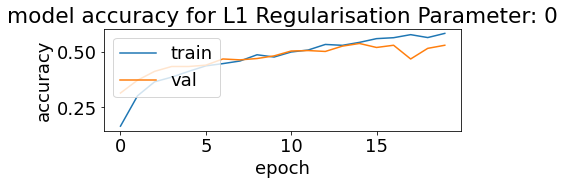

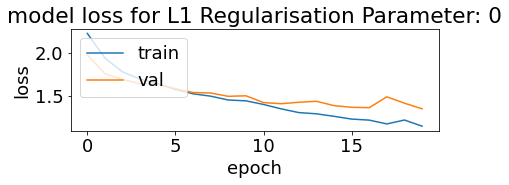

Model Accuracy on Train Data for L1 Regularisation Parameter: 0
              precision    recall  f1-score   support

           0       0.70      0.60      0.64       505
           1       0.64      0.85      0.73       460
           2       0.55      0.55      0.55       519
           3       0.65      0.41      0.50       486
           4       0.52      0.62      0.57       519
           5       0.63      0.52      0.57       488
           6       0.66      0.69      0.68       518
           7       0.66      0.66      0.66       486
           8       0.74      0.73      0.74       520
           9       0.64      0.71      0.68       498

    accuracy                           0.63      4999
   macro avg       0.64      0.63      0.63      4999
weighted avg       0.64      0.63      0.63      4999

[[301  38  27   1  18   2   2  15  75  26]
 [  6 389   3   0   6   1   6   3  15  31]
 [ 22  11 283  15  83  21  34  27  11  12]
 [  6  13  34 200  48  67  50  28   5  35]
 [ 14

In [4]:
l1_regularisation_parameter = 0
CNN_model_array_0 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)

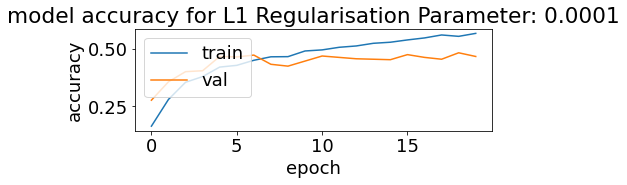

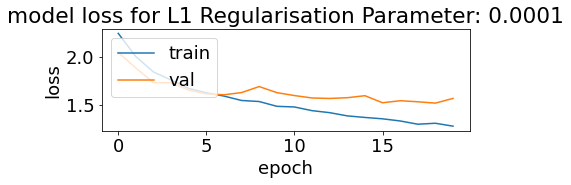

Model Accuracy on Train Data for L1 Regularisation Parameter: 0.0001
              precision    recall  f1-score   support

           0       0.68      0.58      0.63       505
           1       0.72      0.77      0.74       460
           2       0.56      0.46      0.51       519
           3       0.55      0.45      0.50       486
           4       0.61      0.44      0.51       519
           5       0.55      0.50      0.52       488
           6       0.48      0.82      0.61       518
           7       0.61      0.67      0.64       486
           8       0.70      0.66      0.68       520
           9       0.67      0.70      0.69       498

    accuracy                           0.61      4999
   macro avg       0.61      0.61      0.60      4999
weighted avg       0.61      0.61      0.60      4999

[[292  23  20  14   9  11   8  26  73  29]
 [  4 352   0   3   5   4  20   6  18  48]
 [ 22   9 241  29  34  41  85  36  15   7]
 [  4   4  26 220  26  58 108  19   3  18]


In [5]:
l1_regularisation_parameter = 0.0001
CNN_model_array_1 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)

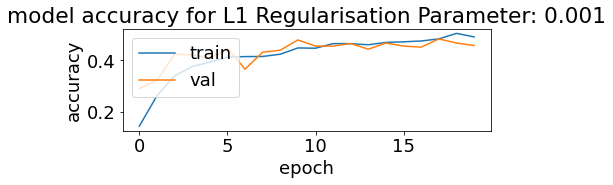

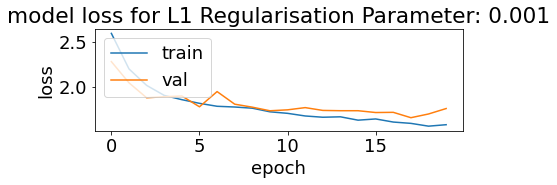

Model Accuracy on Train Data for L1 Regularisation Parameter: 0.001
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       505
           1       0.84      0.44      0.58       460
           2       0.39      0.58      0.47       519
           3       0.52      0.30      0.38       486
           4       0.43      0.50      0.46       519
           5       0.44      0.43      0.43       488
           6       0.46      0.68      0.55       518
           7       0.57      0.56      0.56       486
           8       0.69      0.60      0.64       520
           9       0.59      0.62      0.60       498

    accuracy                           0.52      4999
   macro avg       0.56      0.52      0.53      4999
weighted avg       0.55      0.52      0.53      4999

[[265   7  49   8  34  16   9  26  66  25]
 [ 14 201  12   9   7  17  26  21  37 116]
 [ 19   1 300  15  56  37  56  24   3   8]
 [  4   0  72 145  48  80 112  13   3   9]
 

In [6]:
l1_regularisation_parameter = 0.001
CNN_model_array_2 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)

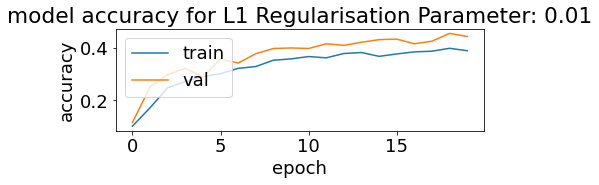

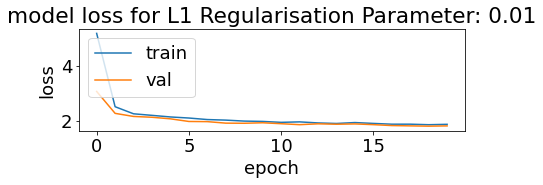

Model Accuracy on Train Data for L1 Regularisation Parameter: 0.01
              precision    recall  f1-score   support

           0       0.52      0.40      0.45       505
           1       0.45      0.65      0.53       460
           2       0.44      0.36      0.39       519
           3       0.73      0.04      0.07       486
           4       0.40      0.34      0.37       519
           5       0.36      0.36      0.36       488
           6       0.38      0.67      0.48       518
           7       0.59      0.37      0.46       486
           8       0.51      0.52      0.52       520
           9       0.40      0.65      0.50       498

    accuracy                           0.44      4999
   macro avg       0.48      0.44      0.41      4999
weighted avg       0.48      0.44      0.41      4999

[[201  51  27   0  12  14   5  14 128  53]
 [  9 297   0   0   3   4  20   7  24  96]
 [ 25  29 186   1  65  41 104  21  29  18]
 [ 13  30  43  19  27 115 146  15  11  67]
 [

In [7]:
l1_regularisation_parameter = 0.01
CNN_model_array_3 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)

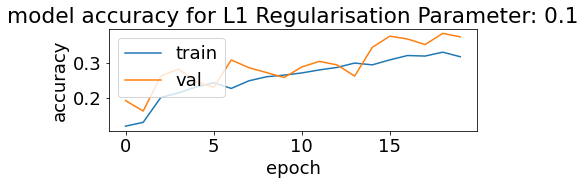

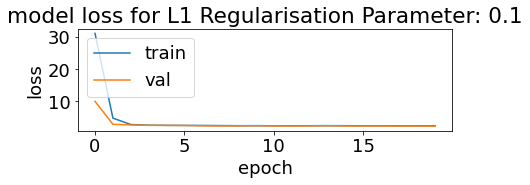

Model Accuracy on Train Data for L1 Regularisation Parameter: 0.1
              precision    recall  f1-score   support

           0       0.57      0.13      0.22       505
           1       0.34      0.60      0.43       460
           2       0.25      0.63      0.36       519
           3       0.36      0.12      0.18       486
           4       0.29      0.17      0.21       519
           5       0.32      0.27      0.29       488
           6       0.58      0.31      0.40       518
           7       0.50      0.32      0.39       486
           8       0.36      0.76      0.49       520
           9       0.56      0.22      0.31       498

    accuracy                           0.35      4999
   macro avg       0.41      0.35      0.33      4999
weighted avg       0.41      0.35      0.33      4999

[[ 67  51  54   3  21   9   1  14 279   6]
 [  2 276  22   5   9  21  11  16  71  27]
 [  6  31 325   4  21  39   6  14  70   3]
 [  5  60 141  59  23  80  41  17  51   9]
 [ 

In [8]:
l1_regularisation_parameter = 0.1
CNN_model_array_4 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)

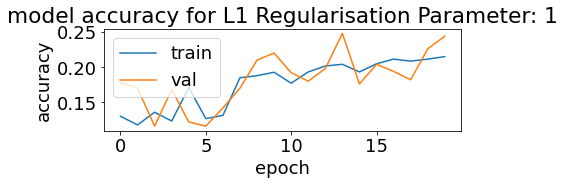

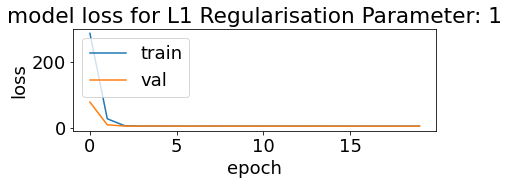

Model Accuracy on Train Data for L1 Regularisation Parameter: 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.58      0.05      0.10       460
           2       0.09      0.20      0.13       519
           3       0.20      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.28      0.02      0.04       488
           6       0.22      0.84      0.35       518
           7       0.48      0.26      0.34       486
           8       0.29      0.74      0.42       520
           9       0.36      0.17      0.23       498

    accuracy                           0.23      4999
   macro avg       0.25      0.23      0.16      4999
weighted avg       0.25      0.23      0.16      4999

[[  0   7  76   1   0   3  30  11 343  34]
 [  0  25 182   0   0   1  78  14 137  23]
 [  0   1 104   0   0   3 293  20  88  10]
 [  0   1 162   1   0   7 256  10  40   9]
 [  0

In [9]:
l1_regularisation_parameter = 1
CNN_model_array_5 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)

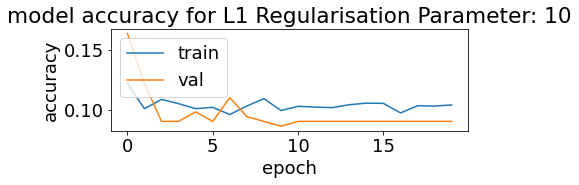

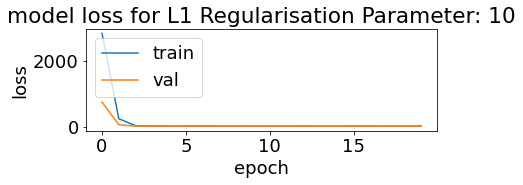

Model Accuracy on Train Data for L1 Regularisation Parameter: 10
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.10      1.00      0.19       519
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0 505   0   0   0   0   0   0   0]
 [  0   0 460   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0 486   0   0   0   0   0   0   0]
 [  

In [10]:
l1_regularisation_parameter = 10
CNN_model_array_6 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)

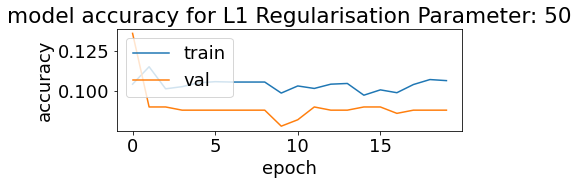

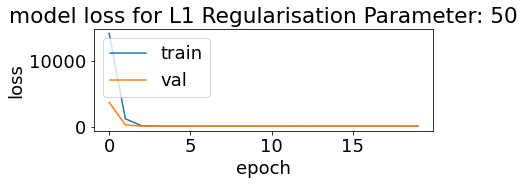

Model Accuracy on Train Data for L1 Regularisation Parameter: 50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.10      1.00      0.19       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0   0   0 505   0   0   0   0   0]
 [  0   0   0   0 460   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0 486   0   0   0   0   0]
 [  

In [11]:
l1_regularisation_parameter = 50
CNN_model_array_7 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)

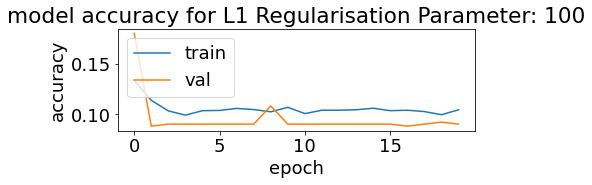

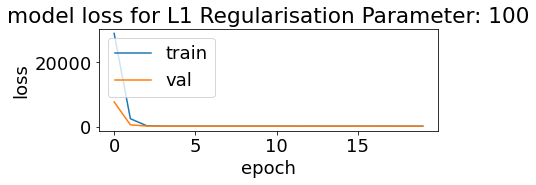

Model Accuracy on Train Data for L1 Regularisation Parameter: 100
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.10      1.00      0.19       519
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0 505   0   0   0   0   0   0   0]
 [  0   0 460   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0 486   0   0   0   0   0   0   0]
 [ 

In [12]:
l1_regularisation_parameter = 100
CNN_model_array_8 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)

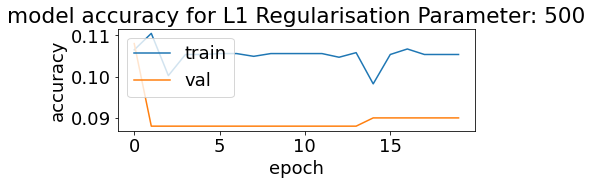

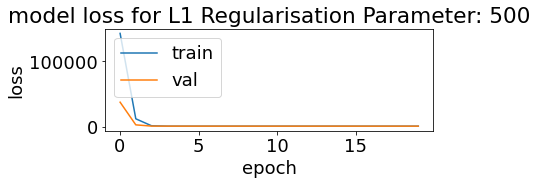

Model Accuracy on Train Data for L1 Regularisation Parameter: 500
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.10      1.00      0.19       519
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0 505   0   0   0   0   0   0   0]
 [  0   0 460   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0 486   0   0   0   0   0   0   0]
 [ 

In [13]:
l1_regularisation_parameter = 500
CNN_model_array_9 = Create_Conv_Model(l1_regularisation_parameter)


orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_43 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_10 (Flatten)        (None, 2048)              0         
                                                                 
 dense_10 (Dens

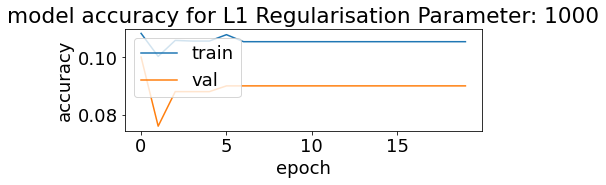

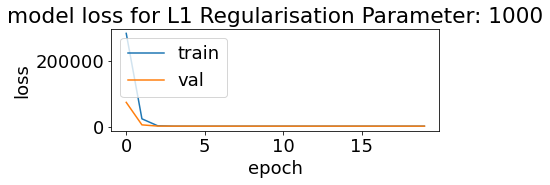

Model Accuracy on Train Data for L1 Regularisation Parameter: 1000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.10      0.99      0.19       519
           3       0.00      0.00      0.00       486
           4       0.09      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.02      0.10      0.02      4999
weighted avg       0.02      0.10      0.02      4999

[[  0   0 500   0   5   0   0   0   0   0]
 [  0   0 460   0   0   0   0   0   0   0]
 [  0   0 516   0   3   0   0   0   0   0]
 [  0   0 485   0   1   0   0   0   0   0]
 [

In [14]:
l1_regularisation_parameter = 1000
CNN_model_array_10 = Create_Conv_Model(l1_regularisation_parameter)


In [15]:
final_data_array = np.vstack((CNN_model_array_0, CNN_model_array_1))
final_data_array = np.vstack((final_data_array, CNN_model_array_2))
final_data_array = np.vstack((final_data_array, CNN_model_array_3))
final_data_array = np.vstack((final_data_array, CNN_model_array_4))
final_data_array = np.vstack((final_data_array, CNN_model_array_5))
final_data_array = np.vstack((final_data_array, CNN_model_array_6))
final_data_array = np.vstack((final_data_array, CNN_model_array_7))
final_data_array = np.vstack((final_data_array, CNN_model_array_8))
final_data_array = np.vstack((final_data_array, CNN_model_array_9))
final_data_array = np.vstack((final_data_array, CNN_model_array_10))

CNN_Models_DF = pd.DataFrame()
CNN_Models_DF = CNN_Models_DF.append(pd.DataFrame(final_data_array, columns = ["L1 Regularisation Parameter", "Training Time", "Accuracy on Training Data", "Accuracy on Test Data"]), ignore_index = True)

display(CNN_Models_DF_style)




,L1 Regularisation Parameter,Training Time,Accuracy on Training Data,Accuracy on Test Data
0,0,29.11 seconds,63.37%,51.59%
1,0.0001,18.2 seconds,60.51%,48.6%
2,0.001,16.72 seconds,52.49%,44.66%
3,0.01,18.24 seconds,43.69%,41.08%
4,0.1,16.76 seconds,35.23%,33.28%
5,1,17.63 seconds,23.34%,22.66%
6,10,17.41 seconds,10.38%,10.0%
7,50,15.96 seconds,10.38%,10.0%
8,100,16.19 seconds,10.38%,10.0%
9,500,17.2 seconds,10.38%,10.0%


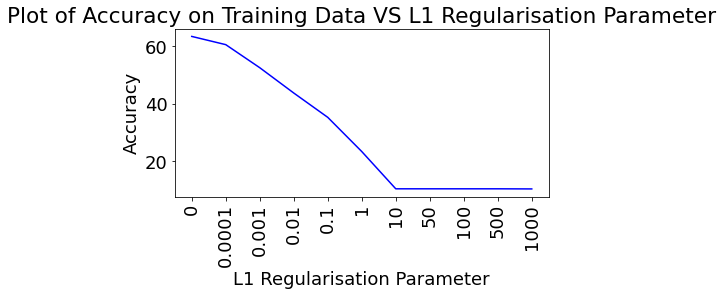

In [16]:
plt.figure()
plt.plot(CNN_Models_DF.loc[:,'L1 Regularisation Parameter'], pd.to_numeric(CNN_Models_DF.loc[:,'Accuracy on Training Data'].str[:-1]), color = 'blue')
plt.xlabel('L1 Regularisation Parameter')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Plot of Accuracy on Training Data VS L1 Regularisation Parameter')
plt.show()

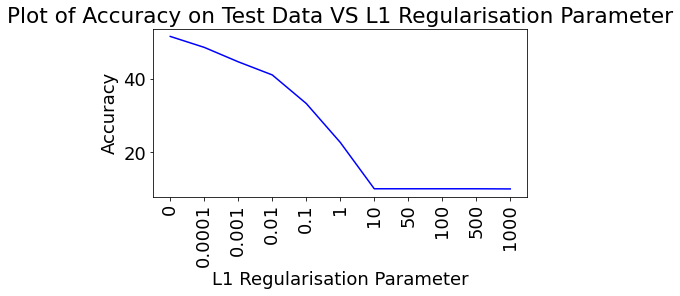

In [17]:
plt.figure()
plt.plot(CNN_Models_DF.loc[:,'L1 Regularisation Parameter'], pd.to_numeric(CNN_Models_DF.loc[:,'Accuracy on Test Data'].str[:-1]), color = 'blue')
plt.xlabel('L1 Regularisation Parameter')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title('Plot of Accuracy on Test Data VS L1 Regularisation Parameter')
plt.show()